# 데이터 분석 & 머신러닝


## 참고 컬럼 요약
   레퍼런스:https://dacon.io/competitions/official/236502/talkboard/414017?page=1&dtype=recent
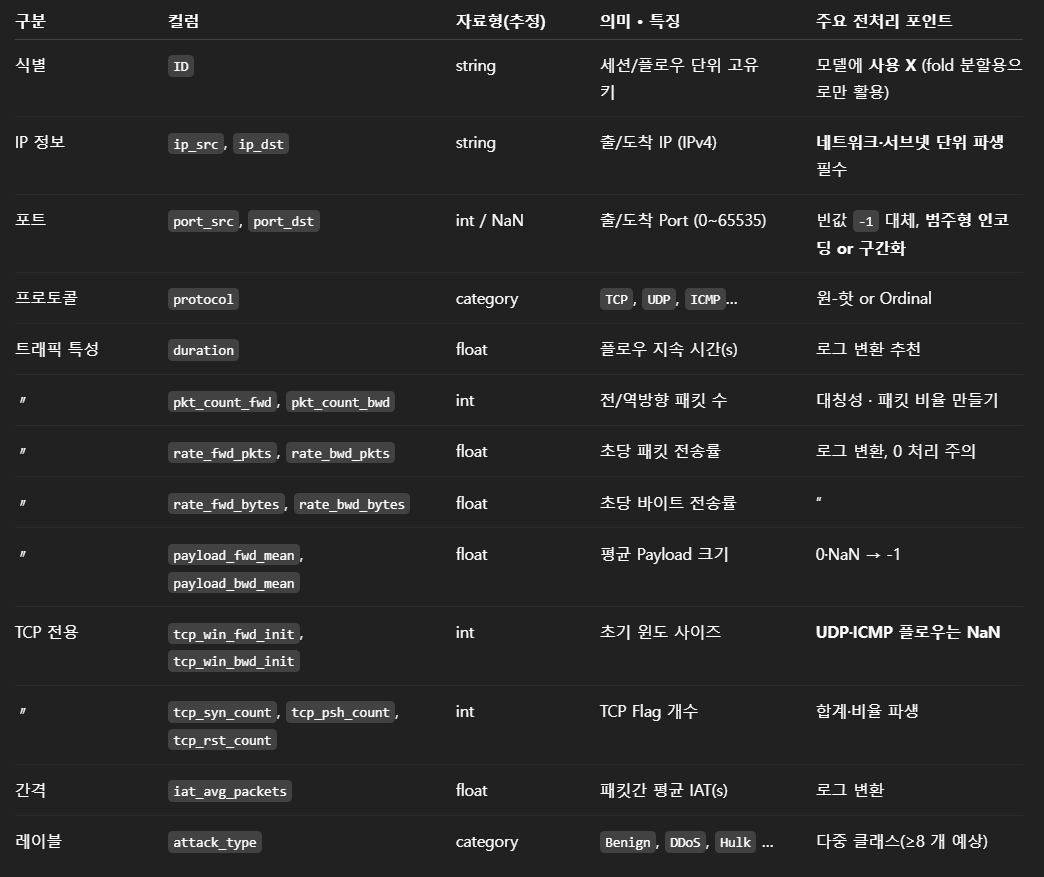

## 데이터 불러오기
 1. 내 드라이브 마운트 후 경로 MyDrive/데이콘/ 내부에서 찾아서 경로 연동


In [66]:
# 쌩 출력
import pandas as pd
PATH_TRAIN = "/content/drive/MyDrive/데이콘/open/train.csv"
train = train = pd.read_csv(PATH_TRAIN)
train

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,TRAIN_11994,192.168.10.243,62329.0,192.168.10.249,49.0,UDP,0.023636,1,1,42.308586,...,5.542425e+03,91.000000,91.000000,0,0,0,0,0,2.363586e-02,Benign
11995,TRAIN_11995,192.168.10.243,60190.0,192.168.10.249,54.0,UDP,0.061452,1,1,16.272824,...,1.253007e+03,61.000000,61.000000,0,0,0,0,0,6.145215e-02,Benign
11996,TRAIN_11996,NaN,5741.0,NaN,NaN,UDP,0.049973,2,2,40.021603,...,3.641966e+03,66.000000,66.000000,0,0,0,0,0,1.665767e-02,Benign
11997,TRAIN_11997,NaN,56610.0,192.168.10.243,NaN,UDP,0.047832,2,2,41.813002,...,5.937446e+03,103.500000,103.500000,0,0,0,0,0,1.594400e-02,Benign


## 기초 통계 및 EDA

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# 경로 train,test
PATH_TRAIN = "/content/drive/MyDrive/데이콘/open/train.csv"
PATH_TEST = "/content/drive/MyDrive/데이콘/open/test.csv"

train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)

print("shape:",train.shape)
print("columns: ", train.columns)

shape: (11999, 22)
columns:  Index(['ID', 'ip_src', 'port_src', 'ip_dst', 'port_dst', 'protocol',
       'duration', 'pkt_count_fwd', 'pkt_count_bwd', 'rate_fwd_pkts',
       'rate_bwd_pkts', 'rate_fwd_bytes', 'rate_bwd_bytes', 'payload_fwd_mean',
       'payload_bwd_mean', 'tcp_win_fwd_init', 'tcp_win_bwd_init',
       'tcp_syn_count', 'tcp_psh_count', 'tcp_rst_count', 'iat_avg_packets',
       'attack_type'],
      dtype='object')


In [68]:
"""
train에 특정 class 증강 후 시작
이유는 나중에 나옴

✅ 2025-06.23 해당 문제는 Web_XSS에 대한 데이터 부족으로 부터 시작하였으며, 해결 방안으로 해당 데이터의 강제 증강을 통해 문제 해결

"""
print("Web_XSS 샘플 수 처음 :", (train['attack_type'] == 'Web_XSS').sum())

# 1. Web_XSS 샘플 필터링
web_xss_df = train[train['attack_type'] == 'Web_XSS']

# 2. Web_XSS 10배 복제
web_xss_augmented = pd.concat([web_xss_df] * 5, ignore_index=True)

# 3. 원본 train과 결합
train_augmented = pd.concat([train, web_xss_augmented], ignore_index=True)

# 4. 결과 확인
print(" 증강 완료")
print("Before:", train.shape)
print("After :", train_augmented.shape)
print("Web_XSS 샘플 수 증강 후:", (train_augmented['attack_type'] == 'Web_XSS').sum())

train = train_augmented

Web_XSS 샘플 수 처음 : 6
 증강 완료
Before: (11999, 22)
After : (12029, 22)
Web_XSS 샘플 수 증강 후: 36


In [69]:
# 결측치 확인
print("\n[결측치]")
print(train.isnull().sum())


[결측치]
ID                     0
ip_src              2517
port_src            3384
ip_dst              1304
port_dst            2287
protocol               0
duration            1079
pkt_count_fwd          0
pkt_count_bwd          0
rate_fwd_pkts       1176
rate_bwd_pkts       1692
rate_fwd_bytes         0
rate_bwd_bytes         0
payload_fwd_mean    1795
payload_bwd_mean    1795
tcp_win_fwd_init       0
tcp_win_bwd_init       0
tcp_syn_count          0
tcp_psh_count          0
tcp_rst_count          0
iat_avg_packets     2770
attack_type            0
dtype: int64


**결측 데이터가 생각보다 많음 어떻게 처리할지 고민 해야함**

In [70]:
# 수치형 컬럼 기준 통계량 확인
print(train.describe())

           port_src      port_dst      duration  pkt_count_fwd  pkt_count_bwd  \
count   8645.000000   9742.000000  10950.000000   12029.000000   12029.000000   
mean   42754.516715   6426.037672     16.678957      15.983374      20.173913   
std    20882.529223  16404.574438    120.043447    1123.753028    1557.567860   
min       11.000000      0.000000      0.000000       0.000000       0.000000   
25%    35813.000000     58.000000      0.000037       1.000000       1.000000   
50%    51267.000000     83.000000      0.023333       2.000000       2.000000   
75%    58154.000000    447.000000      0.365309       6.000000       5.000000   
max    65535.000000  65384.000000   8567.023224  123229.000000  170796.000000   

       rate_fwd_pkts  rate_bwd_pkts  rate_fwd_bytes  rate_bwd_bytes  \
count   1.085300e+04   1.033700e+04    1.202900e+04    1.202900e+04   
mean    6.630075e+03   6.611508e+03    3.197693e+05    1.882900e+05   
std     4.934445e+04   5.197745e+04    6.391764e+06    1.


[공격 유형 분포]
attack_type
Benign             8791
Hulk               1719
Port_Scanning       793
DDoS                471
FTP_Brute_Force      47
GoldenEye            41
Web_XSS              36
Slow_HTTP            34
SSH_Brute_Force      30
Botnet               27
Slowloris            26
Web_Brute_Force      14
Name: count, dtype: int64


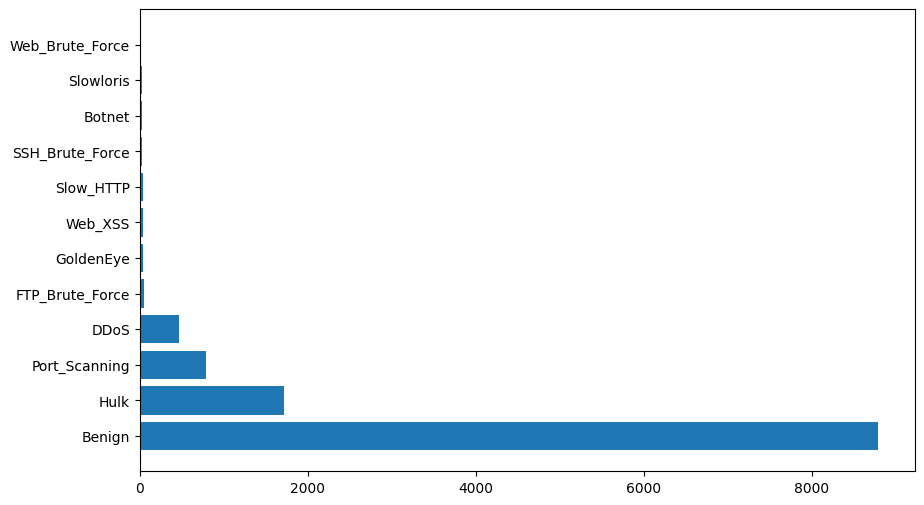

In [71]:
# 공격에 대한 데이터 분포 확인 Y값
print("\n[공격 유형 분포]")
print(train["attack_type"].value_counts())

plt.figure(figsize=(10, 6))
# 가로
plt.barh(train["attack_type"].value_counts().index, train["attack_type"].value_counts().values)
# 세로
# plt.bar(train["attack_type"].value_counts().index, train["attack_type"].value_counts().values)
# plt.xticks(rotation=90) #x-axis labels  x
# plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

해당 그레프로 확인 가능한 점 :
공격 유형 분포를 확인한 결과, "Benign"이 전체의 약 73%를 차지하는 불균형 다중 클래스 문제

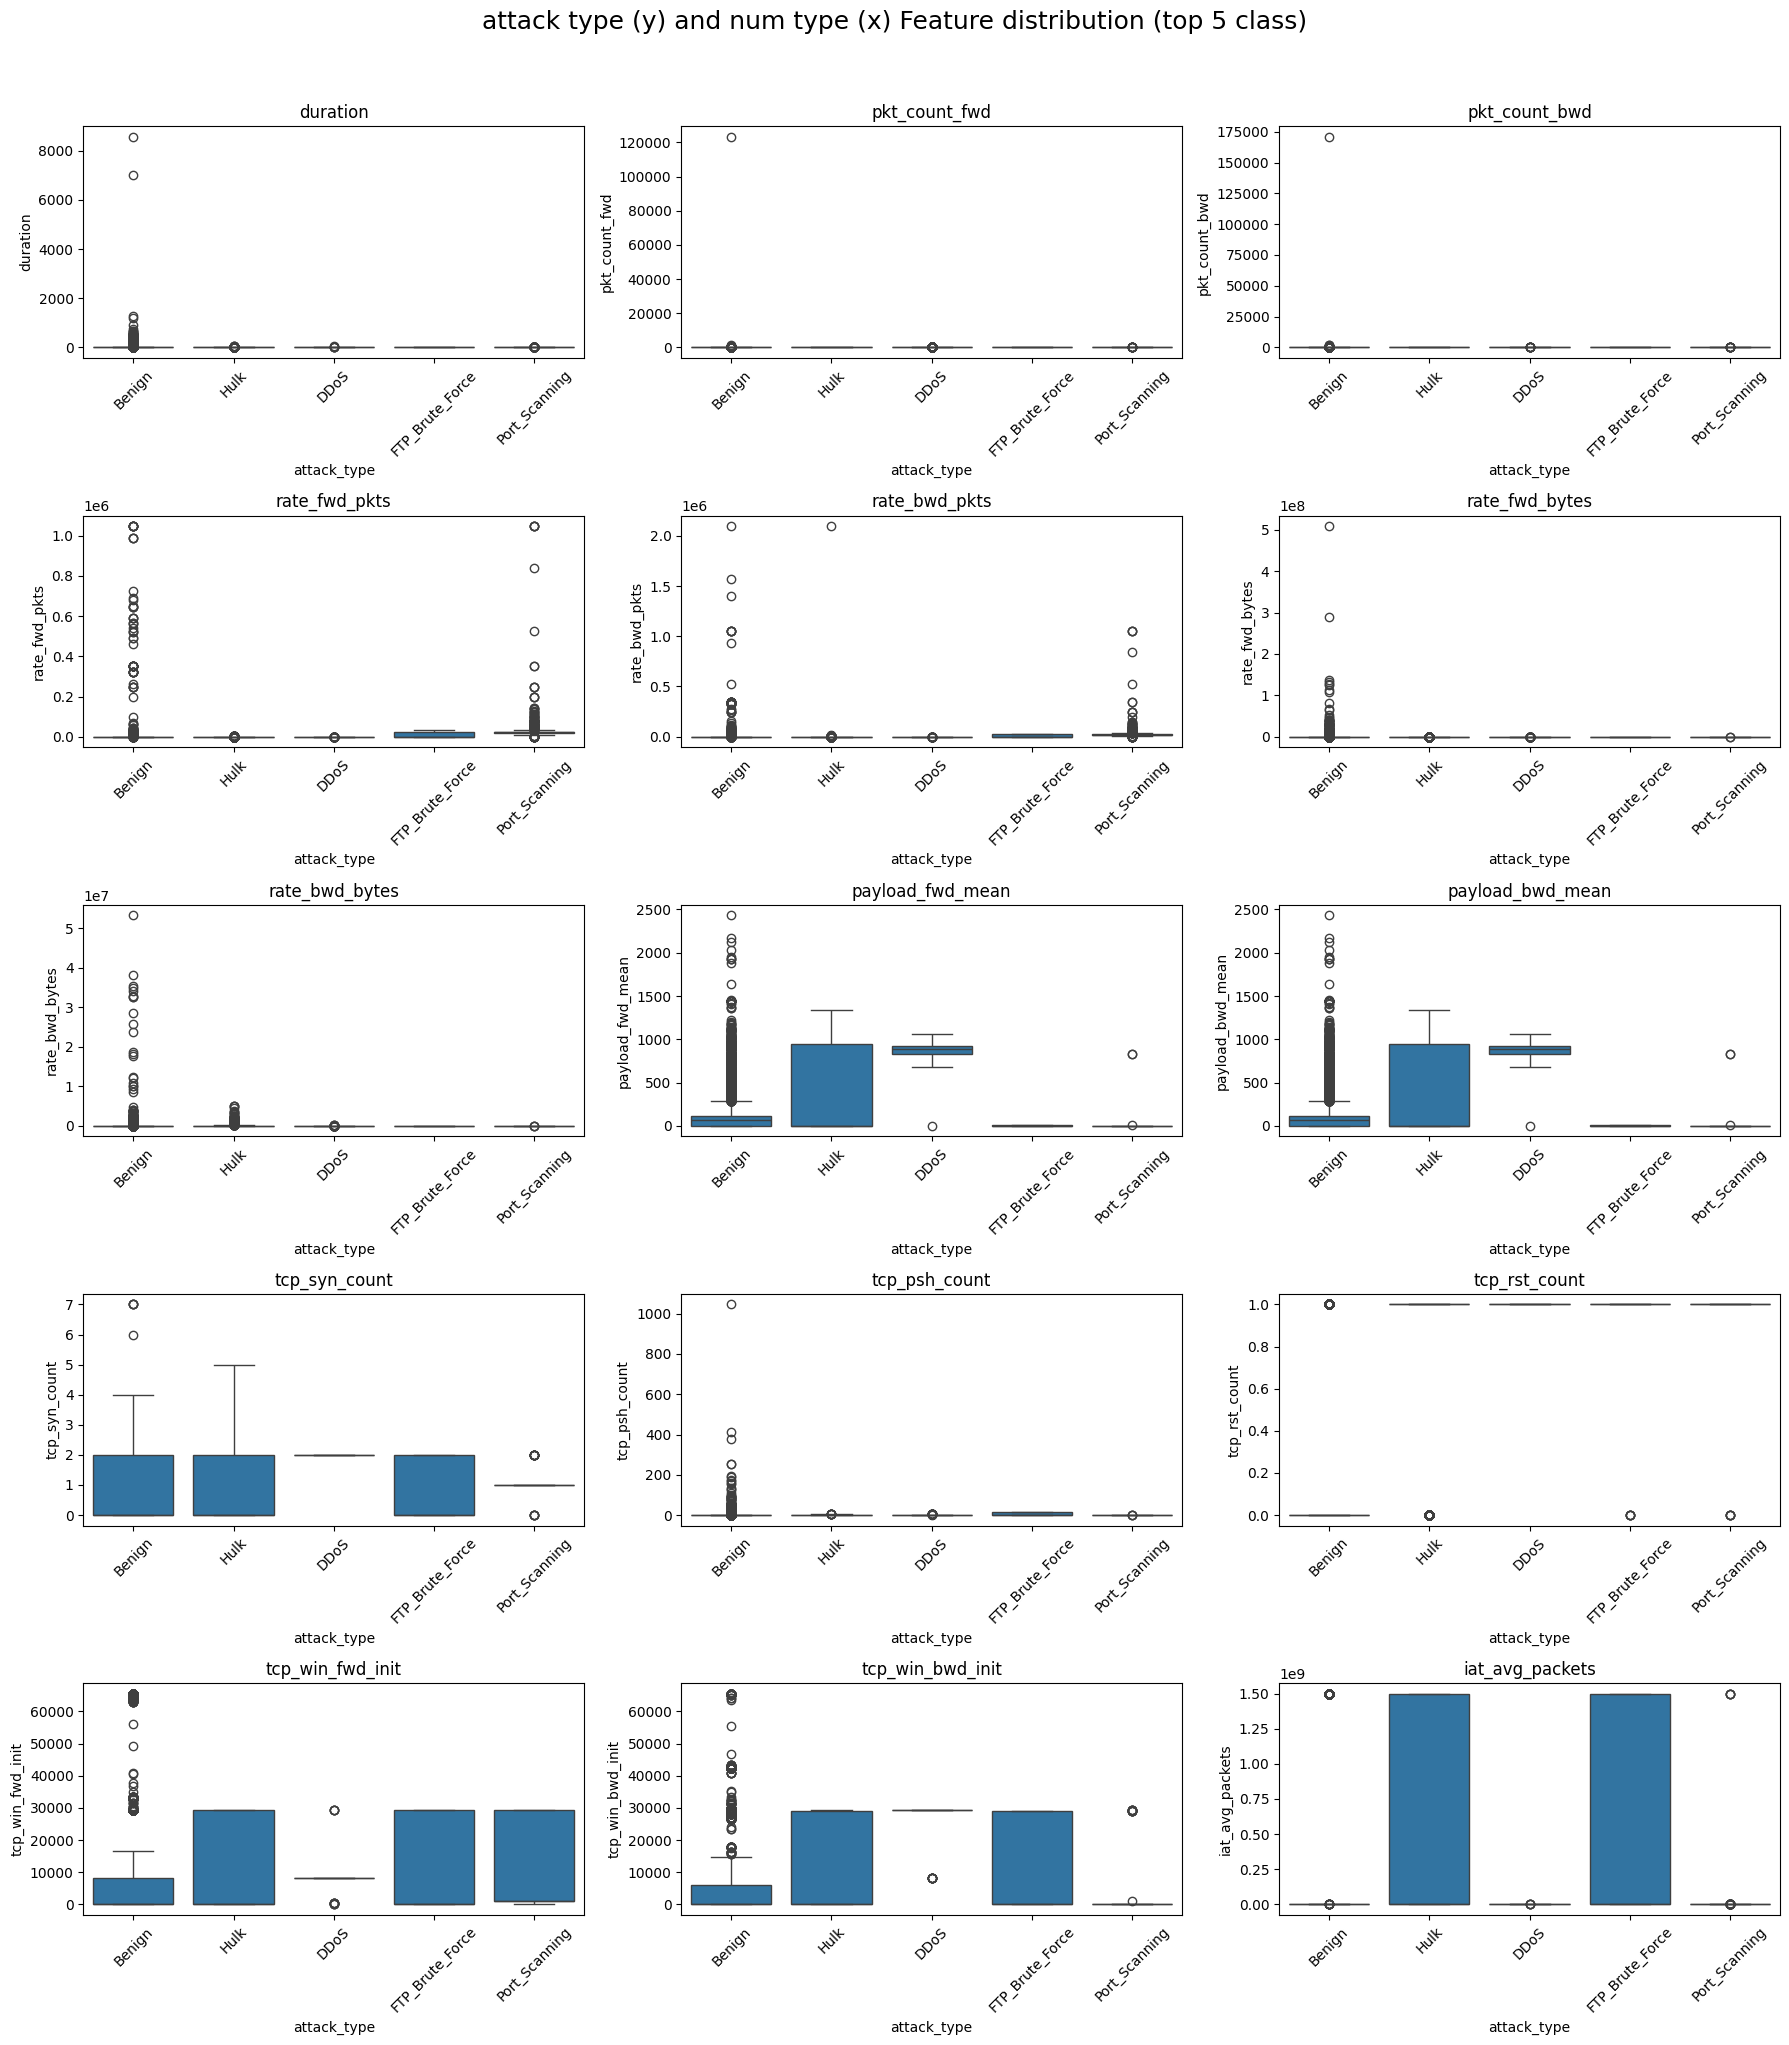

In [72]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'sans-serif'  # 기본 폰트로 리셋

# x 변수들 입력
num_cols = [
    'duration', 'pkt_count_fwd', 'pkt_count_bwd',
    'rate_fwd_pkts', 'rate_bwd_pkts',
    'rate_fwd_bytes', 'rate_bwd_bytes',
    'payload_fwd_mean', 'payload_bwd_mean',
    'tcp_syn_count', 'tcp_psh_count', 'tcp_rst_count',
    'tcp_win_fwd_init', 'tcp_win_bwd_init', 'iat_avg_packets'
]

# 상위 5개만 우선 시각화
top_classes = train['attack_type'].value_counts().head(5).index.tolist()
filtered_df = train[train['attack_type'].isin(top_classes)]

# 시각화
n = len(num_cols)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, 4 * rows))
for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x='attack_type', y=col, data=filtered_df)
    plt.title(col)
    plt.xticks(rotation=45)

plt.suptitle("attack type (y) and num type (x) Feature distribution (top 5 class)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

**그레스 분석**



---


1.   **duration**

    Benign: 다양한 범위에 걸쳐 분포, 중간값이 높음 → 정상 트래픽은 비교적 긴 지속시간을 가짐

    Hulk, DDoS: 대부분 짧은 duration → 짧은 시간에 대량 트래픽을 쏘는 DoS 계열 특징

    Port_Scanning: 상대적으로 짧고 고르게 분포

    FTP_Brute_Force: 꽤 긴 값 분포 → 로그인 시도 반복

    의미: duration은 정상 vs 공격(특히 DoS) 구분에 유효한 feature


---


2.   **pkt_count_fwd & pkt_count_bwd**

    Hulk, DDoS: pkt_count_fwd가 매우 높고, pkt_count_bwd는 낮음 → 일방향 트래픽 집중

    Benign: 양방향 패킷 비율이 상대적으로 균형

    Port_Scanning: 패킷 수가 적음 → 탐지 목적의 간단한 트래픽

    FTP_Brute_Force: bwd 패킷이 일부 분포 → 인증 요청/응답

    의미: 트래픽 방향성과 양은 DoS, Brute Force 계열 구분에 유용



---


3. **rate_fwd_pkts, rate_bwd_pkts**

    Hulk: rate_fwd_pkts가 매우 큼 → 초당 수천 개 패킷 → 트래픽 폭주 공격

    DDoS: 중간 수준의 burst

    Benign: 상대적으로 낮은 rate

    의미: DoS 계열은 속도 기반 탐지에 효과적



---


4. **rate_fwd_bytes, rate_bwd_bytes**

    유사한 분포 → rate_fwd_bytes가 fwd_pkts와 비례

    Hulk는 byte 단위 전송 속도도 매우 큼

    의미: Byte vs packet rate는 보완적으로 사용 가능



---


5. **payload_fwd_mean, payload_bwd_mean**

    Benign: 다양한 분포, 통신 목적이 다양함

    Port_Scanning: 거의 payload 없음 → 스캐닝은 주로 헤더 수준

    FTP_Brute_Force: payload 분포 있음 → 명령어 기반 통신

    의미: payload 평균은 스캐닝/BruteForce 구분에 의미 있음



---


6. **tcp_syn_count, tcp_psh_count, tcp_rst_count**

    Hulk/DDoS: SYN flood 특성 → tcp_syn_count 매우 큼

    Benign: 모든 TCP flag 값이 낮은 수준에서 다양하게 있음

    Port_Scanning: SYN 또는 RST 일부 있음 (스캔 중 연결 시도)

    의미: TCP 플래그 기반 feature는 DoS/스캐닝 계열 탐지에 핵심



---


7. **tcp_win_fwd_init, tcp_win_bwd_init**

    다소 노이즈 많음 → 단일 기준으로 분류는 어려움

    특정 공격에서는 윈도우 값이 고정되는 패턴도 있음

    의미: 제한적인 사용 (다른 feature와 조합하여 활용)



---


8. **iat_avg_packets**

    Benign: 평균간격 시간 길고 다양

    Hulk: 거의 0에 가까운 값 → 연속적 폭주 트래픽

    FTP_Brute_Force: 약간 더 긴 간격 → 일정 간격으로 시도됨

    의미: iat_avg_packets는 DoS 계열의 간격 패턴 탐지에 매우 유용



---




## LightGBM & 변수 중요도

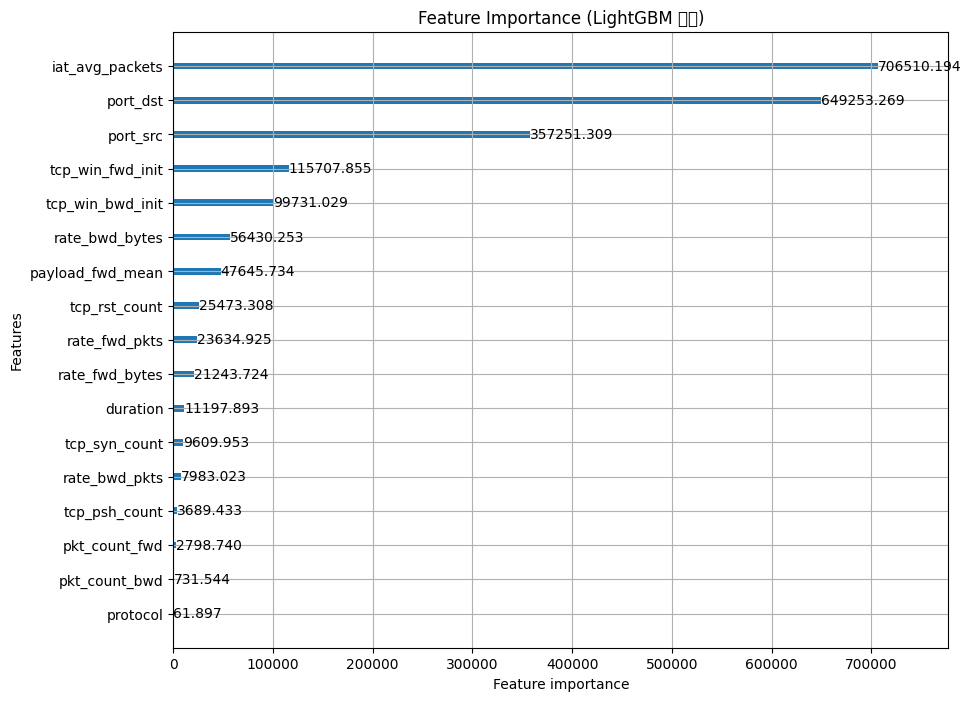

 Report
                 precision    recall  f1-score   support

         Benign       0.99      0.99      0.99      1758
         Botnet       0.62      1.00      0.77         5
           DDoS       1.00      0.96      0.98        94
FTP_Brute_Force       0.50      0.40      0.44        10
      GoldenEye       0.45      0.62      0.53         8
           Hulk       0.97      0.98      0.97       344
  Port_Scanning       1.00      0.95      0.97       159
SSH_Brute_Force       0.56      0.83      0.67         6
      Slow_HTTP       0.75      0.43      0.55         7
      Slowloris       0.50      0.80      0.62         5
Web_Brute_Force       0.20      0.33      0.25         3
        Web_XSS       0.58      1.00      0.74         7

       accuracy                           0.97      2406
      macro avg       0.68      0.77      0.71      2406
   weighted avg       0.98      0.97      0.97      2406

 Accuracy: 0.9738


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import matplotlib.pyplot as plt

# 1. X, y 분리
X = train.drop(columns=['ID', 'ip_src', 'ip_dst', 'attack_type'])  # 필요 없는 열 제거
y = train['attack_type']

# 2. 범주형 인코딩 (protocol)
X['protocol'] = X['protocol'].astype('category')

# 3. 라벨 인코딩 (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. 데이터 분할
X_train, X_val, y_train, y_encoded_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 5. LightGBM 모델 학습
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_encoded_val, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=100,
                  callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)])

# 6. 변수 중요도 시각화
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 8))
plt.title("Feature Importance (LightGBM 기준)")
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# 7. 예측 (확률 → 클래스 index)
y_pred = model.predict(X_val).argmax(axis=1)

# 8. 평가 리포트 출력
print(" Report")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))

# 9. 정확도
acc = accuracy_score(y_encoded_val, y_pred)
print(f" Accuracy: {acc:.4f}")


| 순위  | 변수명                | 중요도 (gain 기준) | 의미                                  |
| --- | ------------------ | ------------- | ----------------------------------- |
| 1   | `iat_avg_packets`  | **889,325**   | 패킷 간 간격 — DoS/BruteForce 판별에 매우 강력  |
| 2   | `port_src`         | 659,568       | 출발지 포트 — 특정 공격은 고정 포트 사용 가능성        |
| 3   | `port_dst`         | 637,921       | 목적지 포트 — 서비스 기반 공격 유형 분류에 활용        |
| 4   | `rate_bwd_pkts`    | 284,643       | 수신 패킷 속도 — 폭주형/응답형 공격 구분            |
| 5   | `rate_bwd_bytes`   | 157,449       | 수신 바이트 속도 — rate\_bwd\_pkts와 유사한 해석 |
| 6   | `payload_fwd_mean` | 94,234        | 페이로드 — 정상/비정상 요청 분류에 유효             |
| 7   | `rate_fwd_pkts`    | 69,632        | 송신 패킷 속도 — DoS 탐지                   |
| 8   | `rate_fwd_bytes`   | 65,736        | 송신 바이트 속도 — 위와 동일                   |
| 9   | `duration`         | 36,862        | 트래픽 지속 시간 — 정상 vs DoS               |
| 10  | `tcp_win_fwd_init` | 33,342        | TCP 세션 특성 (초기 윈도우 크기)               |
| ... | ...                | ...           | ...                                 |


## 데이터 증강 파생변수

더 많은 정보를 가진 파생 변수 생성 - 근거 = 네트워크 통신 패킷에 대한 정보 스터디 후 추가

In [74]:
# 파생변수 추가
# 파생 변수 1. 총 패킷 수 (송신 + 수신)
train['pkt_count_total'] = train['pkt_count_fwd'] + train['pkt_count_bwd']

# 파생 변수 2. 총 패킷 전송 속도 (송신 + 수신)
train['rate_pkts_total'] = train['rate_fwd_pkts'] + train['rate_bwd_pkts']

# 파생 변수 3. 패킷당 평균 페이로드 (송신)
train['payload_fwd_per_pkt'] = train['payload_fwd_mean'] / (train['pkt_count_fwd'] + 1e-5)

# 파생 변수 4. 패킷당 평균 페이로드 (수신)
train['payload_bwd_per_pkt'] = train['payload_bwd_mean'] / (train['pkt_count_bwd'] + 1e-5)

# 파생 변수 5. 전송 속도 × 시간 (송신 측 트래픽 총량 근사)
train['rate_fwd_pkts_time_adj'] = train['rate_fwd_pkts'] * train['duration']

# 파생 변수 6. 전송 속도 × 시간 (수신 바이트 기준 트래픽 총량 근사)
train['rate_bwd_bytes_time_adj'] = train['rate_bwd_bytes'] * train['duration']

### 파생변수 + LightGBM

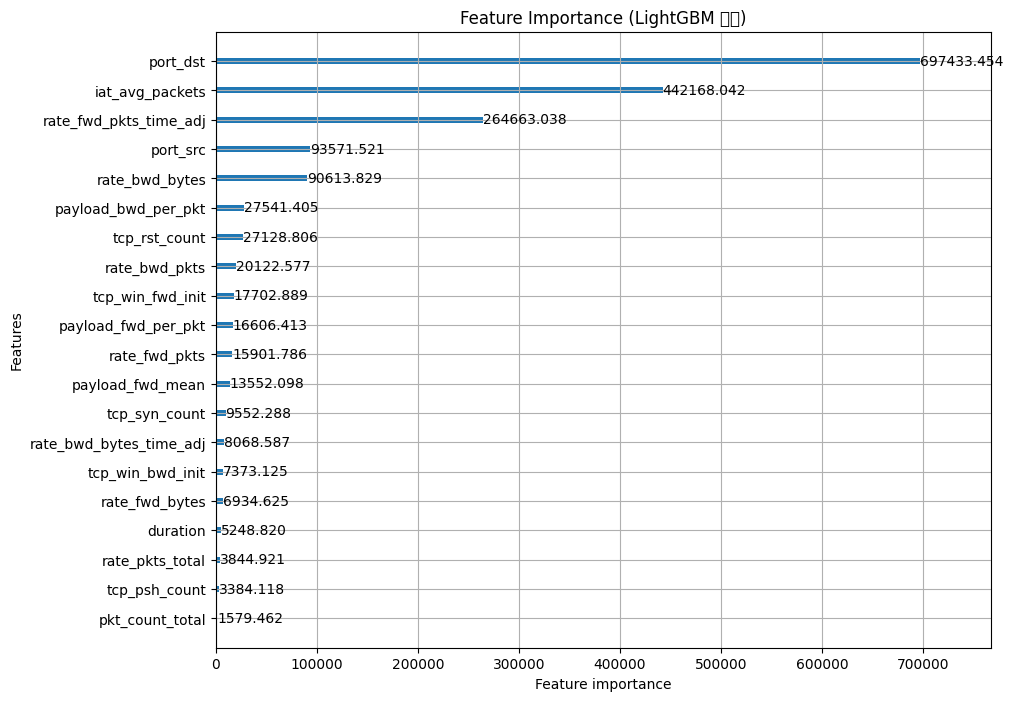

 Report:
                 precision    recall  f1-score   support

         Benign       0.99      0.99      0.99      1758
         Botnet       0.62      1.00      0.77         5
           DDoS       1.00      0.99      0.99        94
FTP_Brute_Force       0.25      0.10      0.14        10
      GoldenEye       1.00      0.62      0.77         8
           Hulk       0.97      0.98      0.97       344
  Port_Scanning       1.00      0.97      0.98       159
SSH_Brute_Force       0.60      1.00      0.75         6
      Slow_HTTP       0.50      0.29      0.36         7
      Slowloris       0.44      0.80      0.57         5
Web_Brute_Force       0.20      0.33      0.25         3
        Web_XSS       0.70      1.00      0.82         7

       accuracy                           0.98      2406
      macro avg       0.69      0.76      0.70      2406
   weighted avg       0.98      0.98      0.98      2406

 Accuracy: 0.9784


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import matplotlib.pyplot as plt

# 1. X, y 분리
X = train.drop(columns=['ID', 'ip_src', 'ip_dst', 'attack_type'])  # 필요 없는 열 제거
y = train['attack_type']

# 2. 범주형 인코딩 (protocol)
X['protocol'] = X['protocol'].astype('category')

# 3. 라벨 인코딩 (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. 데이터 분할
X_train, X_val, y_train, y_encoded_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 5. LightGBM 모델 학습
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_encoded_val, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=100,
                  callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)])

# 6. 변수 중요도 시각화
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 8))
plt.title("Feature Importance (LightGBM 기준)")
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# 7. 예측 (확률 → 클래스 index)
y_pred = model.predict(X_val).argmax(axis=1)

# 8. 평가 리포트 출력
print(" Report:")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))

# 9. 정확도
acc = accuracy_score(y_encoded_val, y_pred)
print(f" Accuracy: {acc:.4f}")


| 변화 유형          | 변수                                                                   | 설명                                                                |
| -------------- | -------------------------------------------------------------------- | ----------------------------------------------------------------- |
| ⬆️ 중요도 급상승     | `payload_fwd_per_pkt`                                                | 파생 변수 중 **가장 상위권 진입 (11위)**. `payload_mean`보다 더 정보력 있는 파생 조합으로 보임 |
| ⬆️ 신규 진입       | `rate_bwd_bytes_time_adj`                                            | **시간 기반 조정된 속도 총량**, 의미 있는 영향 확인됨 (12위권 진입)                       |
| 🔻 기존 변수 하락    | `iat_avg_packets`, `duration`, `rate_fwd_pkts` 등                     | 여전히 중요하나, **신규 파생 변수에게 중요도 일부 양보**                                |
| 🔻 소멸 또는 매우 하락 | `protocol`, `tcp_win_fwd_init`, `rate_pkts_total`, `pkt_count_fwd` 등 | 모델이 덜 사용함 → 제거 가능성 고려 대상                                          |


📌 payload_fwd_per_pkt > payload_fwd_mean
  단순 평균(payload)보다 패킷 수 기준으로 정규화한 값이 더 유효
  DoS나 Brute Force에서 payload 구조적 차이를 더 잘 드러냄

📌 rate_bwd_bytes_time_adj 신규 등장
  트래픽 양의 총합 개념 → DDoS / Hulk 구분에 더 직접적인 힌트 제공

📌 tcp_win_bwd_init 급상승
  예외적: 네트워크 설정 기반 공격 탐지에 기여할 수 있는 구조 신호?

📌 port_src, port_dst 여전히 최상위권
  특정 공격이 특정 포트를 사용함을 강하게 시사 → 다만 과적합 우려는 여전히 있음, test 분포 확인 필요

📉 제거 또는 중요도 낮은 변수 예시

이 변수들은 다음 단계에서 제거 후보로 고려해볼 수 있습니다.

rate_pkts_total =	파생 변수지만 거의 정보력 없음

pkt_count_total, pkt_count_fwd =	기존 변수 중 중복성 높은 변수

tcp_win_fwd_init, protocol =	전혀 사용되지 않음 (importance ≒ 0)

## 과적합 데이터 확인하기(train-test)

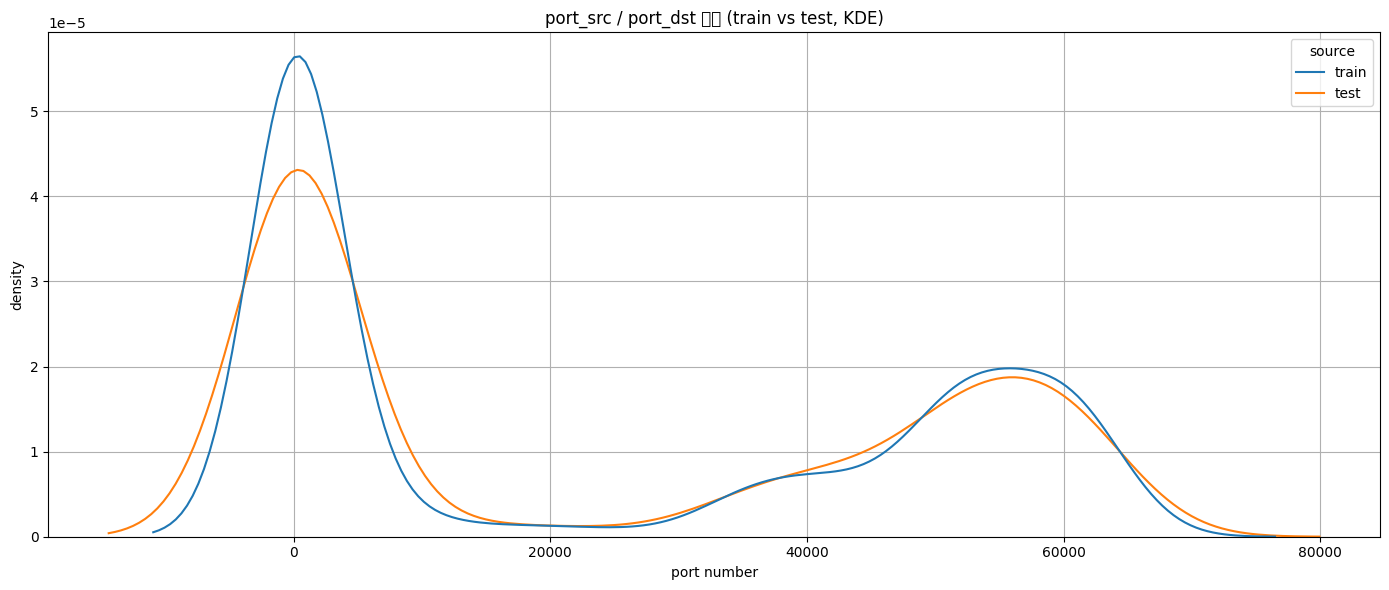

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 포트 컬럼 정수형 변환
train['port_src'] = pd.to_numeric(train['port_src'], errors='coerce')
train['port_dst'] = pd.to_numeric(train['port_dst'], errors='coerce')
test['port_src'] = pd.to_numeric(test['port_src'], errors='coerce')
test['port_dst'] = pd.to_numeric(test['port_dst'], errors='coerce')

# 각각 source 컬럼 추가 후 병합
train_ports = train[['port_src', 'port_dst']].copy()
train_ports['source'] = 'train'
test_ports = test[['port_src', 'port_dst']].copy()
test_ports['source'] = 'test'
combined_ports = pd.concat([train_ports, test_ports])

# melt를 사용해 long-format으로 변환
melted_ports = combined_ports.melt(id_vars='source', value_vars=['port_src', 'port_dst'],
                                   var_name='port_type', value_name='port_number')

# 시각화
plt.figure(figsize=(14, 6))
sns.kdeplot(data=melted_ports.dropna(), x='port_number', hue='source', multiple='layer', common_norm=False)
plt.title("port_src / port_dst 분포 (train vs test, KDE)")
plt.xlabel("port number")
plt.ylabel("density")
plt.grid(True)
plt.tight_layout()

**train - test 차이점 비교**

| 포트 범위                          | 특징                                 | 과적합 위험                                |
| ------------------------------ | ---------------------------------- | ------------------------------------- |
| 0\~1024 (Well-known)           | 두 세트 모두 뚜렷한 피크 있음 (HTTP, FTP 등 포함) | ✅ **위험 있음**: 특정 공격 유형이 이 범위에 집중될 수 있음 |
| 1024\~49151 (Registered)       | train은 상대적으로 분산된 분포, test도 유사함     | ⚠️ 중간 수준                              |
| 49152\~65535 (Dynamic/private) | 두 세트 유사하게 긴 꼬리 존재                  | 🔄 위험 낮음 (랜덤 포트 가능성)                  |


**해결 방안**

port_src, port_dst는 정보량이 풍부하지만, 특정 공격 유형에 과하게 연관될
위험이 있음

특히 **low port (0~1024)**에 집중된 피크는 "암기식 분류" 가능성 존재

| 전략                                                   | 설명                                                      |
| ---------------------------------------------------- | ------------------------------------------------------- |
| ✅ **포트 그룹화** (`well-known`, `registered`, `dynamic`) | 과적합 방지 + 정보 보존                                          |
| ✅ **빈도 인코딩**                                         | test셋에 낮은 빈도인 포트 → 일반화                                  |
| 🚫 **그대로 사용 금지**                                     | 수치 자체를 그대로 쓰는 건 위험 (특히 LightGBM 등 트리 모델은 그 값을 직접 "기억"함) |



In [77]:
# 포트 그룹화

def group_port(port):
    if pd.isna(port): return -1
    port = int(port)
    if port < 1024: return 0   # well-known
    elif port < 49152: return 1  # registered
    else: return 2  # dynamic/private

train['port_src_group'] = train['port_src'].apply(group_port)
train['port_dst_group'] = train['port_dst'].apply(group_port)
test['port_src_group'] = test['port_src'].apply(group_port)
test['port_dst_group'] = test['port_dst'].apply(group_port)

train.head(10)

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,iat_avg_packets,attack_type,pkt_count_total,rate_pkts_total,payload_fwd_per_pkt,payload_bwd_per_pkt,rate_fwd_pkts_time_adj,rate_bwd_bytes_time_adj,port_src_group,port_dst_group
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,NaN,Benign,4,17313.948400,40.499798,40.499798,2.0,264.0,1,0
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,1.499097e+09,Benign,1,0.000000,0.000000,0.000000,0.0,0.0,-1,0
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,4.040012e-02,Hulk,16,26.402559,71.829480,158.024684,11.0,11595.0,-1,0
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,9.125718e-02,Hulk,12,11.954227,165.569168,165.569168,6.0,11595.0,1,-1
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,NaN,Benign,151,NaN,NaN,NaN,NaN,124966.0,2,0
5,TRAIN_00005,192.168.10.205,61716.0,192.168.10.243,46.0,UDP,0.031816,4,4,125.722884,...,NaN,Benign,8,NaN,24.999938,24.999938,4.0,656.0,2,0
6,TRAIN_00006,192.168.10.5,61337.0,157.240.2.200,443.0,TCP,0.000000,1,0,0.000000,...,1.499282e+09,Benign,1,NaN,NaN,NaN,0.0,0.0,2,0
7,TRAIN_00007,192.168.10.43,50154.0,192.168.10.243,58.0,UDP,0.000209,2,2,9576.036530,...,NaN,Benign,4,19152.073059,38.499808,38.499808,2.0,234.0,2,0
8,TRAIN_00008,192.168.10.232,NaN,192.168.10.243,63.0,UDP,0.000271,2,2,7377.843448,...,NaN,Benign,4,14755.686895,33.499833,33.499833,2.0,208.0,-1,0
9,TRAIN_00009,192.168.10.43,2181.0,50.63.243.209,90.0,TCP,NaN,3,2,NaN,...,1.428055e+00,Benign,5,NaN,NaN,NaN,NaN,NaN,1,0


In [78]:
# 최종 컬럼 확인
print("columns: ", train.columns)

columns:  Index(['ID', 'ip_src', 'port_src', 'ip_dst', 'port_dst', 'protocol',
       'duration', 'pkt_count_fwd', 'pkt_count_bwd', 'rate_fwd_pkts',
       'rate_bwd_pkts', 'rate_fwd_bytes', 'rate_bwd_bytes', 'payload_fwd_mean',
       'payload_bwd_mean', 'tcp_win_fwd_init', 'tcp_win_bwd_init',
       'tcp_syn_count', 'tcp_psh_count', 'tcp_rst_count', 'iat_avg_packets',
       'attack_type', 'pkt_count_total', 'rate_pkts_total',
       'payload_fwd_per_pkt', 'payload_bwd_per_pkt', 'rate_fwd_pkts_time_adj',
       'rate_bwd_bytes_time_adj', 'port_src_group', 'port_dst_group'],
      dtype='object')


## 데이터 전처리 및 포트 그룹화

In [79]:
from sklearn.preprocessing import LabelEncoder

# 1. 제거할 컬럼 정의
cols_to_remove = [
    'ID',          # 샘플 식별자
    'ip_src',      # IP는 수치 의미 없음
    'ip_dst',      # "
    'port_src',    # 원본 포트 값은 과적합 유발 → 그룹화한 값으로 대체
    'port_dst',
]

# 2. 제거 및 입력/출력 나누기
X = train.drop(columns=cols_to_remove + ['attack_type'])  # 입력 변수들
y = train['attack_type']                                  # 출력 (목표) 변수

# 3. 결측치 처리
# protocol은 범주형이므로 결측 시 'UNKNOWN' 처리
X['protocol'] = X['protocol'].fillna('UNKNOWN')


In [80]:
# 4. 범주형 인코딩
le_protocol = LabelEncoder()
X['protocol'] = le_protocol.fit_transform(X['protocol'])

# 5. y 라벨 인코딩
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# 결과 출력
print("X shape:", X.shape)
print("결측치 수:\n", X.isnull().sum())
print("y 클래스 목록:", le_y.classes_)

X shape: (12029, 24)
결측치 수:
 protocol                      0
duration                   1079
pkt_count_fwd                 0
pkt_count_bwd                 0
rate_fwd_pkts              1176
rate_bwd_pkts              1692
rate_fwd_bytes                0
rate_bwd_bytes                0
payload_fwd_mean           1795
payload_bwd_mean           1795
tcp_win_fwd_init              0
tcp_win_bwd_init              0
tcp_syn_count                 0
tcp_psh_count                 0
tcp_rst_count                 0
iat_avg_packets            2770
pkt_count_total               0
rate_pkts_total            2711
payload_fwd_per_pkt        1795
payload_bwd_per_pkt        1795
rate_fwd_pkts_time_adj     2164
rate_bwd_bytes_time_adj    1079
port_src_group                0
port_dst_group                0
dtype: int64
y 클래스 목록: ['Benign' 'Botnet' 'DDoS' 'FTP_Brute_Force' 'GoldenEye' 'Hulk'
 'Port_Scanning' 'SSH_Brute_Force' 'Slow_HTTP' 'Slowloris'
 'Web_Brute_Force' 'Web_XSS']


많은 결측치를 중앙값으로 대체한다거나 .. 아에 지울 수 없는 상황 최대한 의미에 맞는 전처리가 필요할 것으로 판단

In [81]:
# payload 관련은 0 (전송 없음) 처리
X['payload_fwd_mean'] = X['payload_fwd_mean'].fillna(0)
X['payload_bwd_mean'] = X['payload_bwd_mean'].fillna(0)
X['payload_fwd_per_pkt'] = X['payload_fwd_per_pkt'].fillna(0)
X['payload_bwd_per_pkt'] = X['payload_bwd_per_pkt'].fillna(0)

# duration, rate 계열도 0 처리 (없음 = 0 의미로 봄)
X['duration'] = X['duration'].fillna(0)
X['rate_fwd_pkts'] = X['rate_fwd_pkts'].fillna(0)
X['rate_bwd_pkts'] = X['rate_bwd_pkts'].fillna(0)
X['rate_fwd_pkts_time_adj'] = X['rate_fwd_pkts_time_adj'].fillna(0)
X['rate_bwd_bytes_time_adj'] = X['rate_bwd_bytes_time_adj'].fillna(0)

# iat_avg_packets는 특이하므로 -1로 대체 (모델이 결측값처럼 인식하게)
X['iat_avg_packets'] = X['iat_avg_packets'].fillna(-1)

# 필요 시 제거할 컬럼 예시 (정보력 낮고 결측 많을 경우)
X.drop(columns=['rate_pkts_total'], inplace=True)

In [82]:
print("결측치 수:\n", X.isnull().sum())

결측치 수:
 protocol                   0
duration                   0
pkt_count_fwd              0
pkt_count_bwd              0
rate_fwd_pkts              0
rate_bwd_pkts              0
rate_fwd_bytes             0
rate_bwd_bytes             0
payload_fwd_mean           0
payload_bwd_mean           0
tcp_win_fwd_init           0
tcp_win_bwd_init           0
tcp_syn_count              0
tcp_psh_count              0
tcp_rst_count              0
iat_avg_packets            0
pkt_count_total            0
payload_fwd_per_pkt        0
payload_bwd_per_pkt        0
rate_fwd_pkts_time_adj     0
rate_bwd_bytes_time_adj    0
port_src_group             0
port_dst_group             0
dtype: int64
X CHECK 2 =        protocol    duration  pkt_count_fwd  pkt_count_bwd  rate_fwd_pkts  \
0             1    0.000231              2              2    8656.974200   
1             0    0.000000              0              1       0.000000   
2             0    0.606002             11              5      18.151760

### 포트 그룹화 + LightGBM

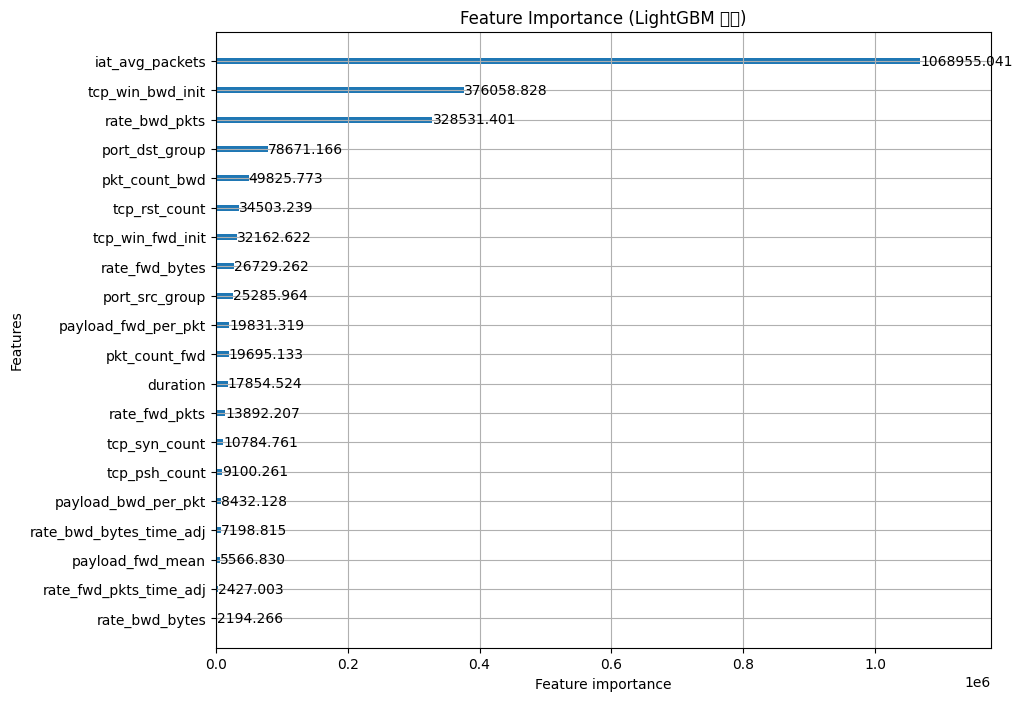

 Report:
                 precision    recall  f1-score   support

         Benign       0.99      0.98      0.99      1758
         Botnet       1.00      1.00      1.00         5
           DDoS       1.00      0.99      0.99        94
FTP_Brute_Force       0.70      0.70      0.70        10
      GoldenEye       1.00      0.88      0.93         8
           Hulk       0.92      0.99      0.96       344
  Port_Scanning       1.00      0.99      0.99       159
SSH_Brute_Force       0.50      1.00      0.67         6
      Slow_HTTP       1.00      0.29      0.44         7
      Slowloris       0.80      0.80      0.80         5
Web_Brute_Force       0.33      0.33      0.33         3
        Web_XSS       0.88      1.00      0.93         7

       accuracy                           0.98      2406
      macro avg       0.84      0.83      0.81      2406
   weighted avg       0.98      0.98      0.98      2406

 Accuracy: 0.9771


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import matplotlib.pyplot as plt

# X, Y 기존꺼 사용

# 1. 데이터 분할
X_train, X_val, y_train, y_encoded_val = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 2. LightGBM 모델 학습
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_encoded_val, reference=lgb_train)

params = {
    'is_unbalance': True,  # 소수 클래스 자동 가중치 적용
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42
}

model = lgb.train(params, lgb_train, valid_sets=[lgb_val], num_boost_round=100,
                  callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)])

# 3. 변수 중요도 시각화
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 8))
plt.title("Feature Importance (LightGBM 기준)")
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# 4. 예측 (확률 → 클래스 index)
y_pred = model.predict(X_val).argmax(axis=1)

# 5. 평가 리포트 출력
print(" Report:")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))

# 6. 정확도
acc = accuracy_score(y_encoded_val, y_pred)
print(f" Accuracy: {acc:.4f}")


## 데이터 증강 SMOTE

In [84]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# 1. 소수 클래스 제거 기준 설정 (예: 6개 미만은 제거)
min_class_samples = 6
class_counts = Counter(y_train)
valid_classes = [cls for cls, cnt in class_counts.items() if cnt >= min_class_samples]

# 2. 해당 클래스만 유지
mask = np.isin(y_train, valid_classes)
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

# 3. SMOTE 적용 (기본 k_neighbors=5, 이제는 안전)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_filtered, y_train_filtered)

# 4. 증강 후 클래스 확인
unique, counts = np.unique(y_train_res, return_counts=True)
for cls, cnt in zip(le_y.inverse_transform(unique), counts):
    print(f"{cls}: {cnt}")


Benign: 7033
Botnet: 7033
DDoS: 7033
FTP_Brute_Force: 7033
GoldenEye: 7033
Hulk: 7033
Port_Scanning: 7033
SSH_Brute_Force: 7033
Slow_HTTP: 7033
Slowloris: 7033
Web_Brute_Force: 7033
Web_XSS: 7033


### SMOTE + LightGBN

In [85]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 검증 데이터는 기존 유지 (X_val, y_encoded_val)

# 2. LightGBM 데이터셋 구성
lgb_train = lgb.Dataset(X_train_res, y_train_res)
lgb_val = lgb.Dataset(X_val, y_encoded_val, reference=lgb_train)

# 3. 파라미터 설정 (불균형 처리 X, 이미 SMOTE로 해결됨)
"""
params = {
    'objective': 'multiclass',             # 다중 클래스 분류
    'num_class': len(np.unique(y_train_res)),
    'metric': 'multi_logloss',             # 평가 지표
    'learning_rate': 0.05,                 # 학습률 (기본: 0.1 → 낮게 조정 시 안정적)
    'max_depth': 7,                        # 트리 최대 깊이 (6~10 사이 튜닝)
    'num_leaves': 64,                      # 하나의 트리에서 쓸 수 있는 최대 리프 노드 수 (작게 = 일반화 ↑)
    'min_data_in_leaf': 20,                # 리프 노드당 최소 샘플 수 (과적합 방지)
    'feature_fraction': 0.8,               # 피처 샘플링 비율 (과적합 방지)
    'bagging_fraction': 0.8,               # 데이터 샘플링 비율
    'bagging_freq': 3,                     # 몇 iteration마다 bagging할지 (0 = 사용 안함)
    'lambda_l1': 1.0,                      # L1 정규화 (lasso)
    'lambda_l2': 1.0,                      # L2 정규화 (ridge)
    'verbosity': -1,
    'seed': 42
}
"""

params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_res)),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'seed': 42
}

# 4. 모델 학습
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_val],
    num_boost_round=200,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# 5. 예측
y_pred = model.predict(X_val).argmax(axis=1)

# 6. 평가 지표 출력
print(" Report:")
print(classification_report(y_encoded_val, y_pred, target_names=le.classes_))

print(f"Accuracy: {accuracy_score(y_encoded_val, y_pred):.4f}")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.0720144
 Report:
                 precision    recall  f1-score   support

         Benign       0.99      0.98      0.99      1758
         Botnet       0.67      0.80      0.73         5
           DDoS       1.00      1.00      1.00        94
FTP_Brute_Force       0.78      0.70      0.74        10
      GoldenEye       0.88      0.88      0.88         8
           Hulk       0.91      1.00      0.95       344
  Port_Scanning       0.99      0.98      0.98       159
SSH_Brute_Force       0.86      1.00      0.92         6
      Slow_HTTP       0.67      0.57      0.62         7
      Slowloris       1.00      0.80      0.89         5
Web_Brute_Force       1.00      0.33      0.50         3
        Web_XSS       0.88      1.00      0.93         7

       accuracy                           0.98      2406
      macro avg       0.88      0.84      0.84      240

**---- 해결 완료 --- 2025.06.21 버전 아래 참고 (최상단 train 에 추가 ✅ 확인)**


전체적으로 성능향을 이뤄내었지만 문제는 Web_XSS 클래스에 대한 데이터가 없을 뿐더러 추가로 독립변수들을 가지고도 예측이 불가능함...

이에대한 해결 방안 모색

| 전략                  | 목적                                      | 사용법      |
| ------------------- | --------------------------------------- | -------- |
| **1. Threshold 조정** | `Web_XSS` 예측 확률이 낮더라도 **의도적으로 예측하게 유도** | 직접적인 효과  |
| **2. SHAP 분석**      | 어떤 feature들이 `Web_XSS` 분류에 영향을 주는지 확인   | 근본 원인 파악 |


## XGBoost

In [86]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. XGBoost용 DMatrix 생성
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dval = xgb.DMatrix(X_val, label=y_encoded_val)

# 2. 파라미터 설정

"""
xgb_params = {
    'objective': 'multi:softprob',       # 다중 클래스 확률 출력
    'num_class': len(np.unique(y_train_res)),
    'eval_metric': 'mlogloss',           # 손실 기준
    'learning_rate': 0.1,                # 학습률 (0.05~0.2 튜닝 가능)
    'max_depth': 6,                      # 트리 깊이 제한 (5~9 사이 추천)
    'min_child_weight': 3,               # 과적합 방지 (3~10 사이 튜닝)
    'subsample': 0.8,                    # 학습 샘플 샘플링 비율 (0.7~1.0)
    'colsample_bytree': 0.8,             # 피처 샘플링 비율 (0.7~1.0)
    'lambda': 1.0,                       # L2 정규화 (ridge)
    'alpha': 0.0,                        # L1 정규화 (lasso)
    'seed': 42,
    'verbosity': 0
}
"""


xgb_params = {
    'objective': 'multi:softprob',
    'num_class': len(np.unique(y_train_res)),
    'eval_metric': 'mlogloss',
    'seed': 42,
    'verbosity': 0
}

# 3. 모델 학습
xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=200,
    evals=[(dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=False
)

# 4. 예측
y_pred_xgb = xgb_model.predict(dval).argmax(axis=1)

# 5. 평가 지표 출력
print("XGBoost Report:")
print(classification_report(y_encoded_val, y_pred_xgb, target_names=le.classes_))
print(f"XGBoost Accuracy: {accuracy_score(y_encoded_val, y_pred_xgb):.4f}")


XGBoost Report:
                 precision    recall  f1-score   support

         Benign       0.99      0.98      0.98      1758
         Botnet       0.75      0.60      0.67         5
           DDoS       0.99      1.00      0.99        94
FTP_Brute_Force       0.58      0.70      0.64        10
      GoldenEye       0.88      0.88      0.88         8
           Hulk       0.91      0.98      0.95       344
  Port_Scanning       0.99      0.97      0.98       159
SSH_Brute_Force       0.75      1.00      0.86         6
      Slow_HTTP       0.83      0.71      0.77         7
      Slowloris       1.00      0.80      0.89         5
Web_Brute_Force       1.00      0.33      0.50         3
        Web_XSS       0.78      1.00      0.88         7

       accuracy                           0.97      2406
      macro avg       0.87      0.83      0.83      2406
   weighted avg       0.97      0.97      0.97      2406

XGBoost Accuracy: 0.9730
